# Getting some statistics on transformed images

In this notebook we got, again, some statistics about images, but now after transformation and augmentation (statistics on augmented images)

# Mounting google drive

In order to make it easy to read data from Google Drive, it can be mounted as a "local" unity. This encapsulates the connection to Google API and reduce the amount of coding that would be needed when interacting with Google API

In [ ]:
# First check if running on Google Colab
try:
    from google.colab import drive

    # Install required packages
    ! pip install pandarallel
    ! pip install opencv-python

    # Mount Drive
    drive.mount("/content/gdrive", force_remount=True)

    IN_COLAB = True
    file_placement = "/content/gdrive/MyDrive/08 CS670 Artificial Intelligence/Term Project/data"
except:
    IN_COLAB = False

    # Install required packages
    ! pip install opencv-python

    import os
    file_placement = os.path.join(os.getcwd(), "..", "data")
print("running in colab?", IN_COLAB, "\ndata files:", file_placement)

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 2.6 MB/s eta 0:00:00
  Created wheel for pandarallel: filename=pandarallel-1.6.5-py3-none-any.whl size=16672 sha256=ee8921a02a1d2a69151750cee122a9e27564ed815ad42eb82ab0582ac8f35448
  Stored in directory: /root/.cache/pip/wheels/50/4f/1e/34e057bb868842209f1623f195b74fd7eda229308a7352d47f
Successfully built pandarallel
Mounted at /content/gdrive
running in colab? True 
data files: /content/gdrive/MyDrive/08 CS670 Artificial Intelligence/Term Project/data


In [ ]:
import os
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms
import pandas as pd

if IN_COLAB:
    base_folder = os.path.join(file_placement, "..", "..", "Publishing")
else:
    base_folder = os.path.join(file_placement, "..")
train_and_test = pd.read_excel(os.path.join(base_folder, "train_and_test_set.xlsx"))

In [ ]:
data_folder = os.path.join(base_folder, "transformed_images")
transform = transforms.Compose([
    transforms.Resize(255),
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(data_folder, transform=transform)

In [ ]:
transform =  transforms.Compose(
    [
        transforms.Resize(255),
        transforms.RandomRotation(90),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.ToTensor()
    ]
)
dataset_augmented = datasets.ImageFolder(data_folder, transform=transform)

In [ ]:
final_dataset = torch.utils.data.ConcatDataset([dataset, dataset_augmented])

In [ ]:
batch_size = 128
final_dataloader = torch.utils.data.DataLoader(final_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

In [ ]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    # inp = inp.numpy().transpose((1, 2, 0))
    plt.imshow(inp)
    plt.title(title)
    plt.show()

0.0 255.0 84.44 91


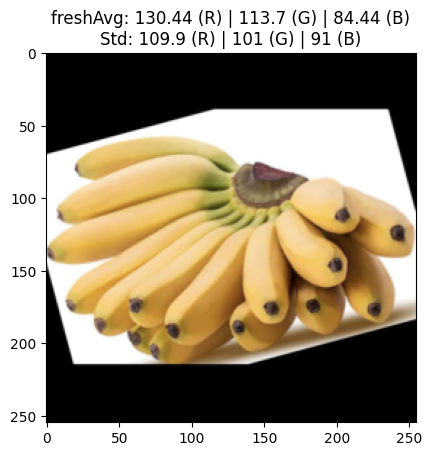

freshAvg: 130.44 (R) | 113.7 (G) | 84.44 (B)
Std: 109.9 (R) | 101 (G) | 91 (B)
0.0 250.0 138.04 98


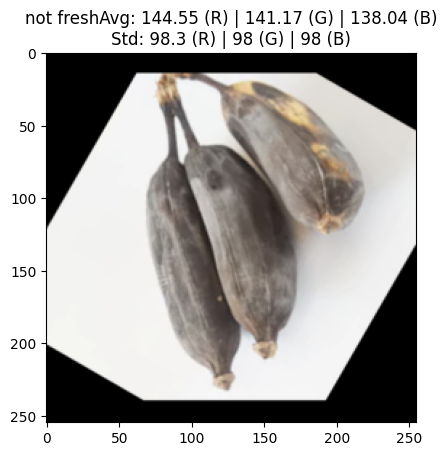

not freshAvg: 144.55 (R) | 141.17 (G) | 138.04 (B)
Std: 98.3 (R) | 98 (G) | 98 (B)
0.0 252.0 80.56 87


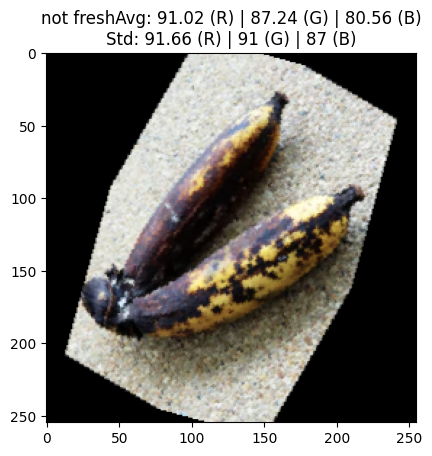

not freshAvg: 91.02 (R) | 87.24 (G) | 80.56 (B)
Std: 91.66 (R) | 91 (G) | 87 (B)
0.0 215.0 81.92 62


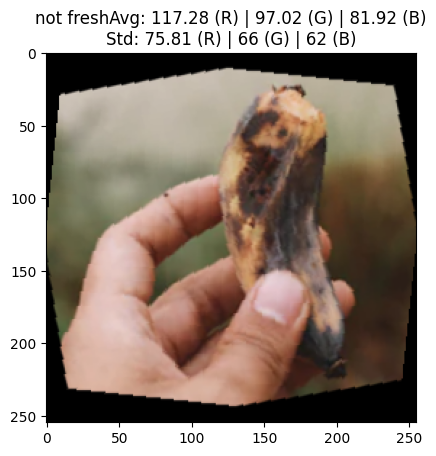

not freshAvg: 117.28 (R) | 97.02 (G) | 81.92 (B)
Std: 75.81 (R) | 66 (G) | 62 (B)
0.0 255.0 132.07 121


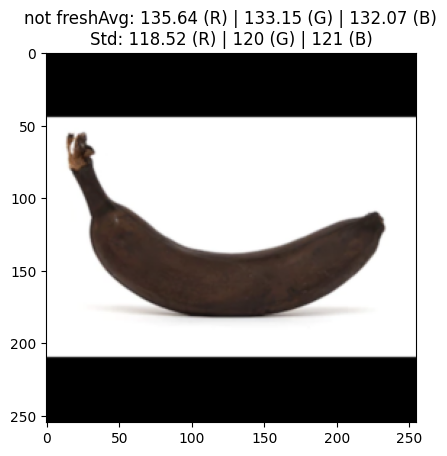

not freshAvg: 135.64 (R) | 133.15 (G) | 132.07 (B)
Std: 118.52 (R) | 120 (G) | 121 (B)
0.0 255.0 132.77 101


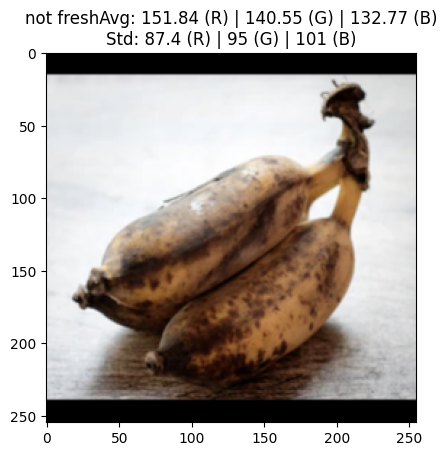

not freshAvg: 151.84 (R) | 140.55 (G) | 132.77 (B)
Std: 87.4 (R) | 95 (G) | 101 (B)


In [ ]:
import numpy as np
np.set_printoptions(precision=2)
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

for x_dataset, y_dataset in final_dataloader:
    for i in range(6):

        r_channel = (x_dataset[i][0] * 255).numpy()
        g_channel = (x_dataset[i][1] * 255).numpy()
        b_channel = (x_dataset[i][2] * 255).numpy()
        r_min, r_max, r_avg, r_std = r_channel.min(), r_channel.max(), round(r_channel.mean(), 2), round(r_channel.std(), 2)
        g_min, g_max, g_avg, g_std = g_channel.min(), g_channel.max(), round(g_channel.mean(), 2), round(g_channel.std())
        b_min, b_max, b_avg, b_std = b_channel.min(), b_channel.max(), round(b_channel.mean(), 2), round(b_channel.std())
        if y_dataset[i] == 0:
            title = "fresh"
        else:
            title = "not fresh"
        # title = f"Min: {int(r_min)} (R) | {int(g_min)} (G) | {int(b_min)} (B)"
        # title = title + f"\nMax: {int(r_max)} (R) | {int(g_max)} (G) | {int(b_max)} (B)"
        title = title + f"Avg: {str(r_avg)} (R) | {str(g_avg)} (G) | {str(b_avg)} (B)"
        title = title + f"\nStd: {str(r_std)} (R) | {str(g_std)} (G) | {str(b_std)} (B)"
        inp = x_dataset[i].numpy().transpose((1, 2, 0))

        print(b_min, b_max, b_avg, b_std)
        imshow(inp, title)
        print(title)
    break

In [ ]:
fresh = 0
not_fresh = 0
li = []

for x_dataset, y_dataset in final_dataloader:
    for i in range(len(x_dataset)):
        row = {}
        r_channel = (x_dataset[i][0] * 255).numpy()
        g_channel = (x_dataset[i][1] * 255).numpy()
        b_channel = (x_dataset[i][2] * 255).numpy()
        r_avg, r_std, r_var = round(r_channel.mean(), 2), round(r_channel.std(), 2), round(r_channel.var(), 2)
        g_avg, g_std, g_var = round(g_channel.mean(), 2), round(g_channel.std(), 2), round(g_channel.var(), 2)
        b_avg, b_std, b_var = round(b_channel.mean(), 2), round(b_channel.std(), 2), round(b_channel.var(), 2)

        row["r_avg"] = r_avg
        row["r_std"] = r_std
        row["r_var"] = r_var
        row["g_avg"] = g_avg
        row["g_std"] = g_std
        row["g_var"] = g_var
        row["b_avg"] = b_avg
        row["b_std"] = b_std
        row["b_var"] = b_var

        if y_dataset[i] == 0:
            if fresh < 51:
                row["sample"] = fresh + 1
                row["fresh"] = True
                li.append(row)
                fresh = fresh + 1
        else:
            if not_fresh < 51:
                row["sample"] = not_fresh + 1
                row["fresh"] = False
                li.append(row)
                not_fresh = not_fresh + 1

        if not_fresh > 50 and fresh > 50:
            break



In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.DataFrame(li)

,r_avg,r_std,r_var,g_avg,g_std,g_var,b_avg,b_std,b_var,sample,fresh
0,186.64,105.83,11200.54,180.53,104.52,10923.82,159.32,110.18,12140.18,1,True
1,58.70,83.27,6933.63,52.33,78.87,6220.66,48.20,76.93,5918.48,1,False
2,233.16,51.00,2601.02,221.40,54.50,2970.71,178.53,87.67,7686.03,2,True
3,115.50,90.67,8221.67,116.74,94.30,8892.28,120.61,99.17,9835.34,2,False
4,125.07,123.08,15149.79,119.58,118.79,14110.42,105.15,112.24,12598.73,3,True
...,...,...,...,...,...,...,...,...,...,...,...
97,121.24,124.52,15506.32,114.01,118.44,14028.43,94.55,110.57,12225.64,47,True
98,125.23,123.50,15251.65,119.82,119.28,14227.05,107.99,114.54,13119.55,48,True
99,67.59,108.96,11871.58,64.31,104.38,10895.25,56.12,96.35,9283.61,49,True
100,187.18,96.86,9382.31,177.80,94.81,8989.39,146.05,98.77,9755.92,50,True
